In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [3]:
# Reading the dataset
day = pd.read_csv("day.csv")

In [4]:
day.head()
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Univariate Analysis

array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'cnt'}>, <Axes: >]], dtype=object)

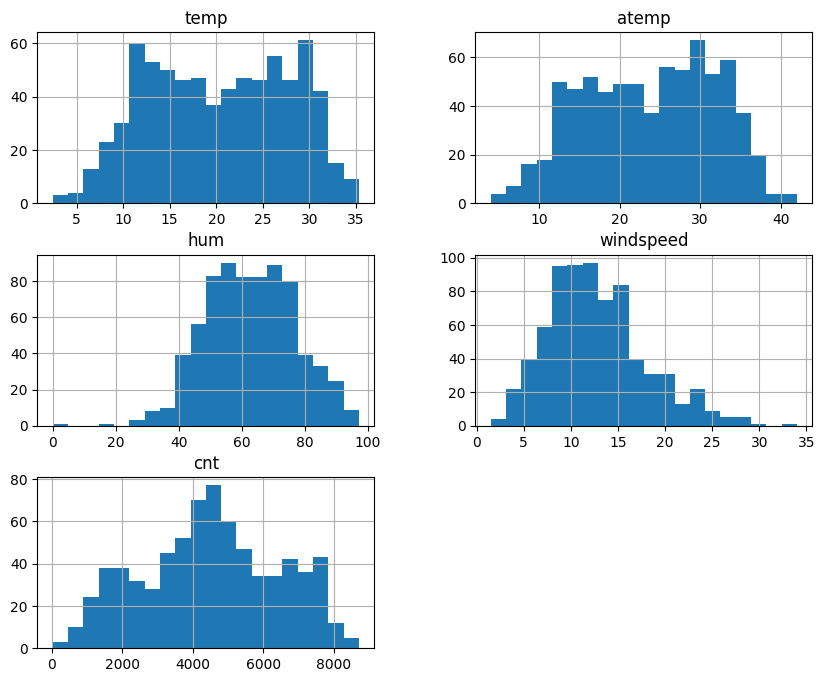

In [6]:
# Continuous Variables analysis (temp, atemp, hum, windspeed, cnt)
day[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].hist(bins=20, figsize=(10, 8))

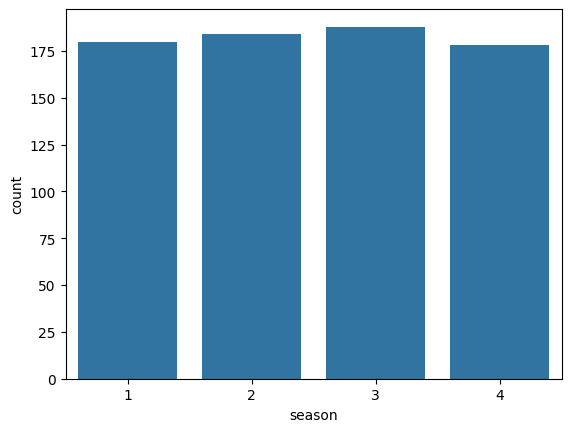

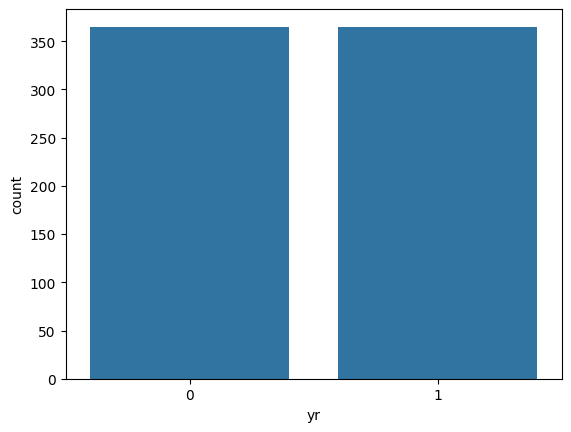

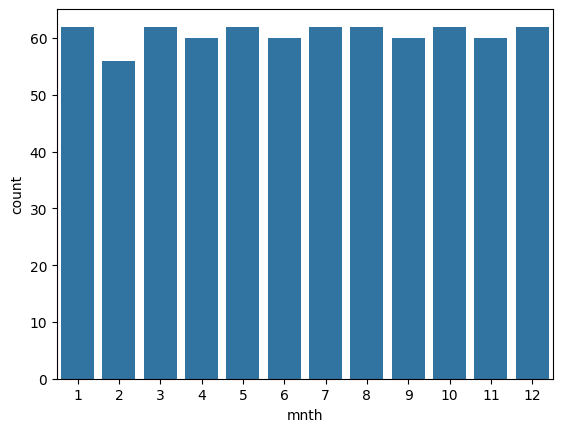

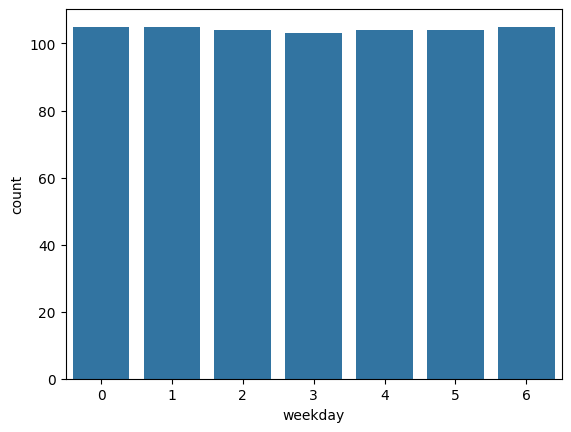

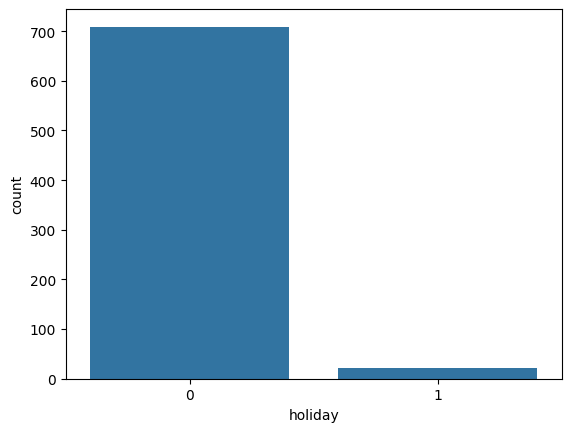

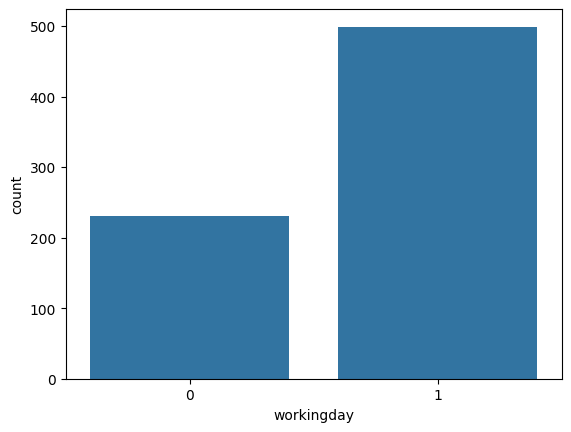

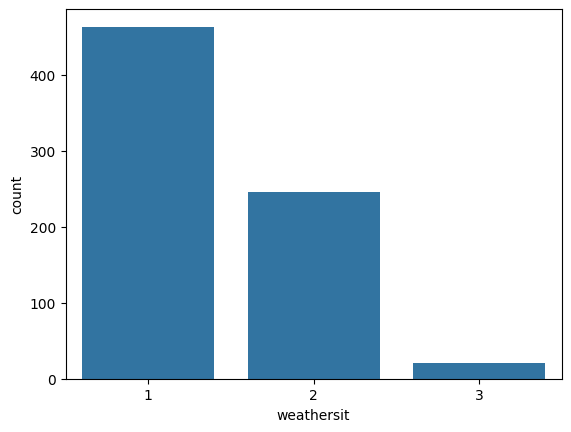

In [7]:
# Bar plots to show frequencies
for col in ['season', 'yr', 'mnth', 'weekday', 'holiday', 'workingday', 'weathersit']:
    sns.countplot(x=col, data=day)
    plt.show()

In [ ]:
# Multivariate analysis

<Axes: >

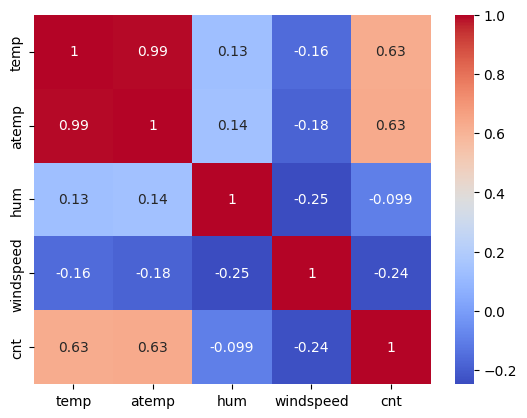

In [8]:
correlation_matrix = day[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# atemp and temp are highly correlated

In [9]:
# data transformation
# Replace season values
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
day['season'] = day['season'].map(season_mapping)

# Replace weathersit values
weathersit_mapping = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
}
day['weathersit'] = day['weathersit'].map(weathersit_mapping)

# Replace yr values
year_mapping = {0: 2018, 1: 2019}
day['yr'] = day['yr'].map(year_mapping)


In [10]:
day.drop(columns=['instant', 'casual', 'registered', 'dteday', 'atemp'], inplace=True)

In [11]:
day = pd.get_dummies(day, columns=['season', 'weathersit'], drop_first=True)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# day[['temp', 'hum', 'windspeed']] = scaler.fit_transform(day[['temp', 'hum', 'windspeed']])


In [12]:
print(day.info())
print(day.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          730 non-null    int64  
 1   mnth                        730 non-null    int64  
 2   holiday                     730 non-null    int64  
 3   weekday                     730 non-null    int64  
 4   workingday                  730 non-null    int64  
 5   temp                        730 non-null    float64
 6   hum                         730 non-null    float64
 7   windspeed                   730 non-null    float64
 8   cnt                         730 non-null    int64  
 9   season_spring               730 non-null    bool   
 10  season_summer               730 non-null    bool   
 11  season_winter               730 non-null    bool   
 12  weathersit_Light Snow/Rain  730 non-null    bool   
 13  weathersit_Mist             730 non

In [13]:
# Splitting test and train data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Separate features and target
X = day.drop(columns=['cnt'])  # Drop target
y = day['cnt']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Instantiate Linear Regression
lm = LinearRegression()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['temp', 'hum', 'windspeed']] = scaler.fit_transform(X_train[['temp', 'hum', 'windspeed']])
# scaler = MinMaxScaler()
# X_train[['temp', 'hum', 'windspeed']] = scaler.fit_transform(X_train[['temp', 'hum', 'windspeed']])

# Fit the model
lm.fit(X_train, y_train)

# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 2021.69938615    11.39449796  -561.02503626    69.15666749
   166.38694355   966.68603029  -162.39663071  -266.15920097
  -592.3202275    421.95752716   752.10018701 -2151.02516491
  -495.24257591]
-4076619.886118698


In [14]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# RFE with 10 features
lm = LinearRegression()
rfe1 = RFE(lm, n_features_to_select=10)

# Fit with the training data
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)
print(rfe1.ranking_)

[ True False  True False False  True  True  True  True  True  True  True
  True]
[1 4 1 3 2 1 1 1 1 1 1 1 1]


In [15]:
# Get the selected features' indices
selected_features = X_train.columns[rfe1.support_]

# Print the selected features
print("Selected features:", selected_features)


Selected features: Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'weathersit_Light Snow/Rain',
       'weathersit_Mist'],
      dtype='object')


In [16]:
import numpy as np
import statsmodels.api as sm

# Convert boolean mask to integer (True -> 1, False -> 0)
selected_features_int = np.where(rfe1.support_, 1, 0)

# Subset the features selected by RFE
col1 = X_train.columns[selected_features_int == 1]
print(col1)

# Subsetting training data for the selected columns
X_train_rfe1 = X_train[col1]

# Convert boolean columns to integers (True -> 1, False -> 0)
X_train_rfe1 = X_train_rfe1.astype(int)

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fit the model with the selected variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()
print(lm1.summary())


Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'weathersit_Light Snow/Rain',
       'weathersit_Mist'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     174.2
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          7.68e-156
Time:                        17:17:17   Log-Likelihood:                -4213.2
No. Observations:                 511   AIC:                             8448.
Df Residuals:                     500   BIC:                             8495.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X_train_rfe1.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
print(vif)



                       Feature           VIF
0                        const  1.652163e+07
1                           yr  1.013452e+00
2                      holiday  1.014407e+00
3                         temp  2.281727e+00
4                          hum  1.450619e+00
5                    windspeed  1.150457e+00
6                season_spring  3.308228e+00
7                season_summer  1.984429e+00
8                season_winter  2.220678e+00
9   weathersit_Light Snow/Rain  1.174677e+00
10             weathersit_Mist  1.270112e+00


In [18]:
X_train_rfe1_reduced = X_train_rfe1.drop(columns=['hum', 'season_summer', 'season_winter'])
lm2 = sm.OLS(y_train, X_train_rfe1_reduced).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     248.1
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.22e-158
Time:                        17:17:27   Log-Likelihood:                -4215.0
No. Observations:                 511   AIC:                             8446.
Df Residuals:                     503   BIC:                             8480.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [19]:
vif = pd.DataFrame()
vif["Feature"] = X_train_rfe1_reduced.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe1_reduced.values, i) for i in range(X_train_rfe1_reduced.shape[1])]
print(vif)

                      Feature           VIF
0                       const  1.650783e+07
1                          yr  1.012583e+00
2                     holiday  1.006002e+00
3                        temp  1.467979e+00
4                   windspeed  1.041459e+00
5               season_spring  1.476437e+00
6  weathersit_Light Snow/Rain  1.036072e+00
7             weathersit_Mist  1.031471e+00


In [20]:
X_train_final = X_train_rfe1.drop(columns=['season_summer', 'season_winter', 'hum'])
lm_final = sm.OLS(y_train, X_train_final).fit()
print(lm_final.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     248.1
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.22e-158
Time:                        17:17:35   Log-Likelihood:                -4215.0
No. Observations:                 511   AIC:                             8446.
Df Residuals:                     503   BIC:                             8480.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

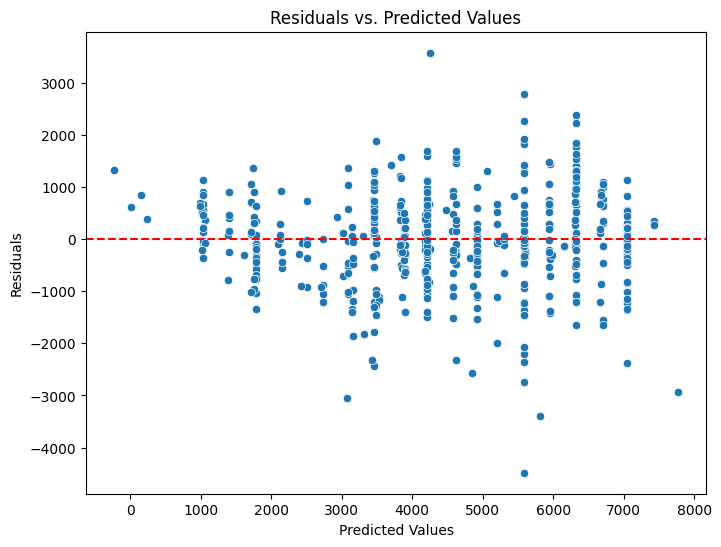

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predicted values and residuals
predictions = lm2.predict(X_train_final)
residuals = y_train - predictions

# Scatter plot: Predicted values vs. residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

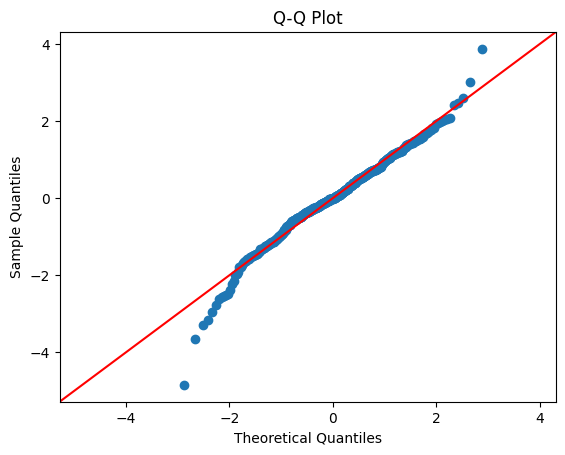

In [22]:
import statsmodels.api as sm

# Q-Q plot
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot")
plt.show()
# Good: Points lie along the 45-degree line.

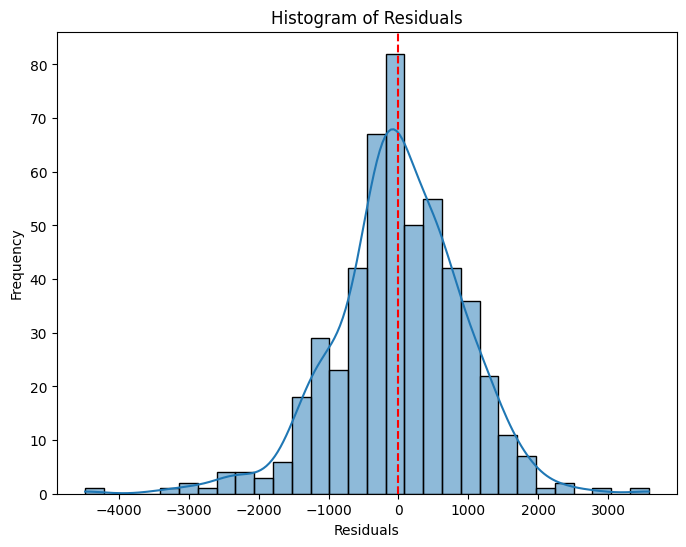

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()
# Residuals are approximately normally distributed (bell curve).

In [24]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {dw_stat}")
# Residuals are independent

Durbin-Watson Statistic: 2.002577760247973


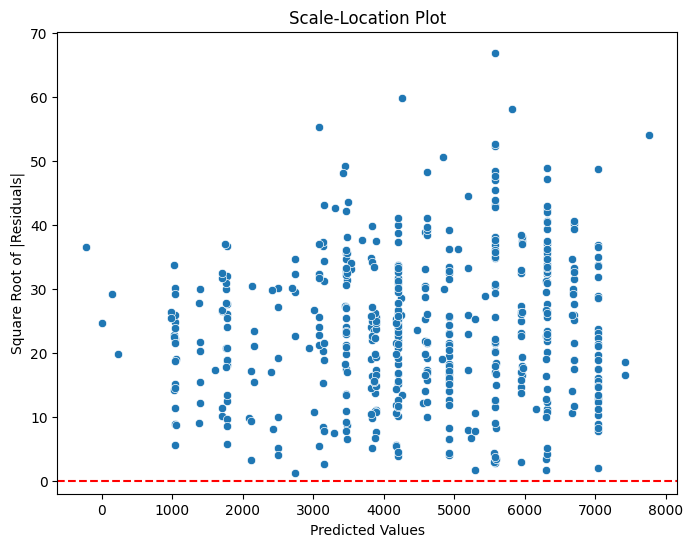

In [25]:
# Scale-Location Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=predictions, y=np.sqrt(np.abs(residuals)))
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Square Root of |Residuals|")
plt.title("Scale-Location Plot")
plt.show()


In [26]:
# Make predictions on the test set
X_test_with_const = sm.add_constant(X_test)
X_test_reduced = X_test_with_const[X_train_final.columns]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_test_reduced[['temp', 'windspeed']] = scaler.fit_transform(X_test_reduced[['temp', 'windspeed']])

predictions_test = lm_final.predict(X_test_reduced)

# Calculate performance metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions_test)
r2 = r2_score(y_test, predictions_test)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")


Mean Squared Error (MSE): 820839.8115667945
R-squared: 0.7712486345939042


<ipython-input-26-96f96080c1d5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_reduced[['temp', 'windspeed']] = scaler.fit_transform(X_test_reduced[['temp', 'windspeed']])


In [27]:
# compare test and train performance
# Evaluate on training set
predictions_train = lm_final.predict(X_train_final)
mse_train = mean_squared_error(y_train, predictions_train)
r2_train = r2_score(y_train, predictions_train)

print(f"Train MSE: {mse_train}")
print(f"Train R-squared: {r2_train}")


Train MSE: 855308.4635634924
Train R-squared: 0.7754128190951428
